###Interpolasi adalah teknik penemuan nilai tengah diantara dua nilai yang diketahui. Terdapat nilai atas dan nilai bawah yang digunakan untuk memprediksi nilai-nilai tengah yang hilang.

##IMPORT LIBRARY DAN DATA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
sheet_id = "10usp8jy0WUlMdnZq0bpfNZJeBWIr3TFjznoj1YxUL5g"
sheet_name = "Data-IOT-Interpolasi"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

In [ ]:
df = pd.read_csv(url)

##MEREVIEW DATA

In [ ]:
df

,tanggal,datakecepatanangin,datasuhuudara,datakelembabanudara,dataphtanah,datakelembabantanah,datasuhutanah,Harga Bawang Brebes
0,12/1/2022,NaN,NaN,NaN,NaN,NaN,NaN,30000
1,12/2/2022,NaN,NaN,NaN,NaN,NaN,NaN,30000
2,12/3/2022,NaN,NaN,NaN,NaN,NaN,NaN,31000
3,12/4/2022,NaN,NaN,NaN,NaN,NaN,NaN,31000
4,12/5/2022,NaN,NaN,NaN,NaN,NaN,NaN,31000
...,...,...,...,...,...,...,...,...
85,2/24/2023,NaN,NaN,NaN,NaN,NaN,NaN,35833
86,2/25/2023,NaN,NaN,NaN,NaN,NaN,NaN,35833
87,2/26/2023,NaN,NaN,NaN,NaN,NaN,NaN,35833
88,2/27/2023,NaN,NaN,NaN,NaN,NaN,NaN,37666


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tanggal               90 non-null     object 
 1   datakecepatanangin    55 non-null     float64
 2   datasuhuudara         55 non-null     float64
 3   datakelembabanudara   55 non-null     float64
 4   dataphtanah           55 non-null     float64
 5   datakelembabantanah   55 non-null     float64
 6   datasuhutanah         55 non-null     float64
 7   Harga Bawang Brebes   90 non-null     int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 5.8+ KB


##MENYALIN DATA DAN MENGUBAH DTYPE TANGGAL DARI OBJECT MENJADI DATETIME

In [ ]:
df_fix = df.copy()
df_fix["tanggal"] = pd.to_datetime(df_fix["tanggal"], format='%m/%d/%Y')

In [ ]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   tanggal               90 non-null     datetime64[ns]
 1   datakecepatanangin    55 non-null     float64       
 2   datasuhuudara         55 non-null     float64       
 3   datakelembabanudara   55 non-null     float64       
 4   dataphtanah           55 non-null     float64       
 5   datakelembabantanah   55 non-null     float64       
 6   datasuhutanah         55 non-null     float64       
 7   Harga Bawang Brebes   90 non-null     int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 5.8 KB


##MELIHAT KORELASI ANTAR KOLOM PADA DATASET

<Axes: >

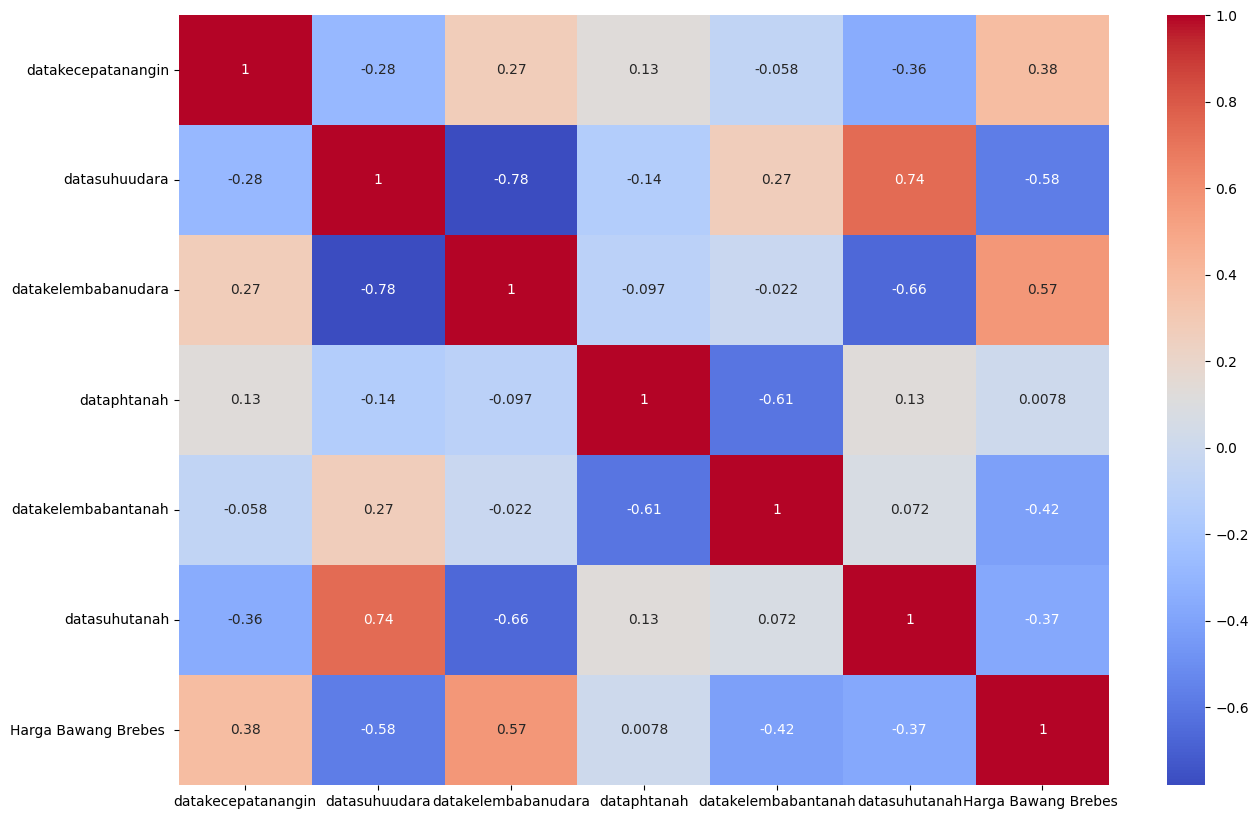

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')

##MENGISI DATA KOSONG MENGGUNAKAN INTERPOLASI

In [ ]:
#Set 'Date' Column to index
df_fix = df_fix.set_index('tanggal')

In [ ]:
df_fix['datakecepatanangin'][0:90]

tanggal
2022-12-01   NaN
2022-12-02   NaN
2022-12-03   NaN
2022-12-04   NaN
2022-12-05   NaN
              ..
2023-02-24   NaN
2023-02-25   NaN
2023-02-26   NaN
2023-02-27   NaN
2023-02-28   NaN
Name: datakecepatanangin, Length: 90, dtype: float64

In [ ]:
# Interpolate using the time series method
df_fix.interpolate(limit_direction='both',method='time',inplace=True)
df_fix['datakecepatanangin'][0:90]

tanggal
2022-12-01    15.2
2022-12-02    15.2
2022-12-03    15.2
2022-12-04    15.2
2022-12-05    15.2
              ... 
2023-02-24    25.1
2023-02-25    25.1
2023-02-26    25.1
2023-02-27    25.1
2023-02-28    25.1
Name: datakecepatanangin, Length: 90, dtype: float64

In [ ]:
df_fix['datasuhuudara'][0:90]

tanggal
2022-12-01    31.9
2022-12-02    31.9
2022-12-03    31.9
2022-12-04    31.9
2022-12-05    31.9
              ... 
2023-02-24    22.0
2023-02-25    22.0
2023-02-26    22.0
2023-02-27    22.0
2023-02-28    22.0
Name: datasuhuudara, Length: 90, dtype: float64

In [ ]:
df_fix['datakelembabanudara'][0:90]

tanggal
2022-12-01    80.5
2022-12-02    80.5
2022-12-03    80.5
2022-12-04    80.5
2022-12-05    80.5
              ... 
2023-02-24    97.4
2023-02-25    97.4
2023-02-26    97.4
2023-02-27    97.4
2023-02-28    97.4
Name: datakelembabanudara, Length: 90, dtype: float64

In [ ]:
df_fix['dataphtanah'][0:90]

tanggal
2022-12-01    4.5
2022-12-02    4.5
2022-12-03    4.5
2022-12-04    4.5
2022-12-05    4.5
             ... 
2023-02-24    5.0
2023-02-25    5.0
2023-02-26    5.0
2023-02-27    5.0
2023-02-28    5.0
Name: dataphtanah, Length: 90, dtype: float64

In [ ]:
df_fix['datakelembabantanah'][0:90]

tanggal
2022-12-01    63.0
2022-12-02    63.0
2022-12-03    63.0
2022-12-04    63.0
2022-12-05    63.0
              ... 
2023-02-24    47.2
2023-02-25    47.2
2023-02-26    47.2
2023-02-27    47.2
2023-02-28    47.2
Name: datakelembabantanah, Length: 90, dtype: float64

In [ ]:
df_fix['datasuhutanah'][0:90]

tanggal
2022-12-01    30.9
2022-12-02    30.9
2022-12-03    30.9
2022-12-04    30.9
2022-12-05    30.9
              ... 
2023-02-24    12.6
2023-02-25    12.6
2023-02-26    12.6
2023-02-27    12.6
2023-02-28    12.6
Name: datasuhutanah, Length: 90, dtype: float64

In [ ]:
df_fix['datakecepatanangin'][50:90]

tanggal
2023-01-20     9.1
2023-01-21     9.1
2023-01-22     9.1
2023-01-23    10.8
2023-01-24    12.5
2023-01-25    14.2
2023-01-26    15.9
2023-01-27    17.6
2023-01-28    19.3
2023-01-29    21.0
2023-01-30    22.7
2023-01-31    24.4
2023-02-01    26.1
2023-02-02    27.8
2023-02-03    13.1
2023-02-04    21.6
2023-02-05    17.7
2023-02-06    16.1
2023-02-07    26.4
2023-02-08    25.9
2023-02-09    25.4
2023-02-10    24.9
2023-02-11    24.9
2023-02-12    24.9
2023-02-13    24.9
2023-02-14    24.9
2023-02-15    25.0
2023-02-16    25.0
2023-02-17    25.0
2023-02-18    25.1
2023-02-19    25.1
2023-02-20    25.1
2023-02-21    25.1
2023-02-22    25.1
2023-02-23    25.1
2023-02-24    25.1
2023-02-25    25.1
2023-02-26    25.1
2023-02-27    25.1
2023-02-28    25.1
Name: datakecepatanangin, dtype: float64

##MELAKUKAN RESET INDEX

In [ ]:
df_fix.reset_index()

,tanggal,datakecepatanangin,datasuhuudara,datakelembabanudara,dataphtanah,datakelembabantanah,datasuhutanah,Harga Bawang Brebes
0,2022-12-01,15.2,31.9,80.5,4.5,63.0,30.9,30000
1,2022-12-02,15.2,31.9,80.5,4.5,63.0,30.9,30000
2,2022-12-03,15.2,31.9,80.5,4.5,63.0,30.9,31000
3,2022-12-04,15.2,31.9,80.5,4.5,63.0,30.9,31000
4,2022-12-05,15.2,31.9,80.5,4.5,63.0,30.9,31000
...,...,...,...,...,...,...,...,...
85,2023-02-24,25.1,22.0,97.4,5.0,47.2,12.6,35833
86,2023-02-25,25.1,22.0,97.4,5.0,47.2,12.6,35833
87,2023-02-26,25.1,22.0,97.4,5.0,47.2,12.6,35833
88,2023-02-27,25.1,22.0,97.4,5.0,47.2,12.6,37666


##EXPORT DATASET KE EXCEL

In [ ]:
#download file excel yang telah di clean
df_fix.to_excel("iot_brebes_interpolasi.xlsx", index=True)

#library untuk download file
from google.colab import files
files.download("iot_brebes_interpolasi.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>